In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def correct_wm(img, wm):
    wm = np.tile(wm, (img.shape[0] // wm.shape[0] + 1, img.shape[1] // wm.shape[1] + 1))
    wm = wm[:img.shape[0], :img.shape[1]]
    return wm


def insert_watermark(image, wm, bin_field: int, base=8):
    if(image.shape != wm.shape):
        wm = correct_wm(image, wm)

    image_fields = np.unpackbits(image).reshape((image.shape[0], image.shape[1], base))
    wm_image_fields = image_fields.copy()
    for i in range(image_fields.shape[0]):
        for j in range(image_fields.shape[1]):
            wm_image_fields[i][j][base-bin_field] = image_fields[i][j][base-bin_field] ^ wm[i][j]
    packed_wm_im = np.packbits(wm_image_fields).reshape(image.shape)
    return packed_wm_im

In [3]:
#image / container
img = Image.open('imgs/image.png')
img_b = np.array(img)[:,:,2] # blue chanell

#mask / watermark
wm = Image.open('imgs/watermark.png').convert("L")
wm_bin = np.where(np.array(wm) < 128, 1, 0)

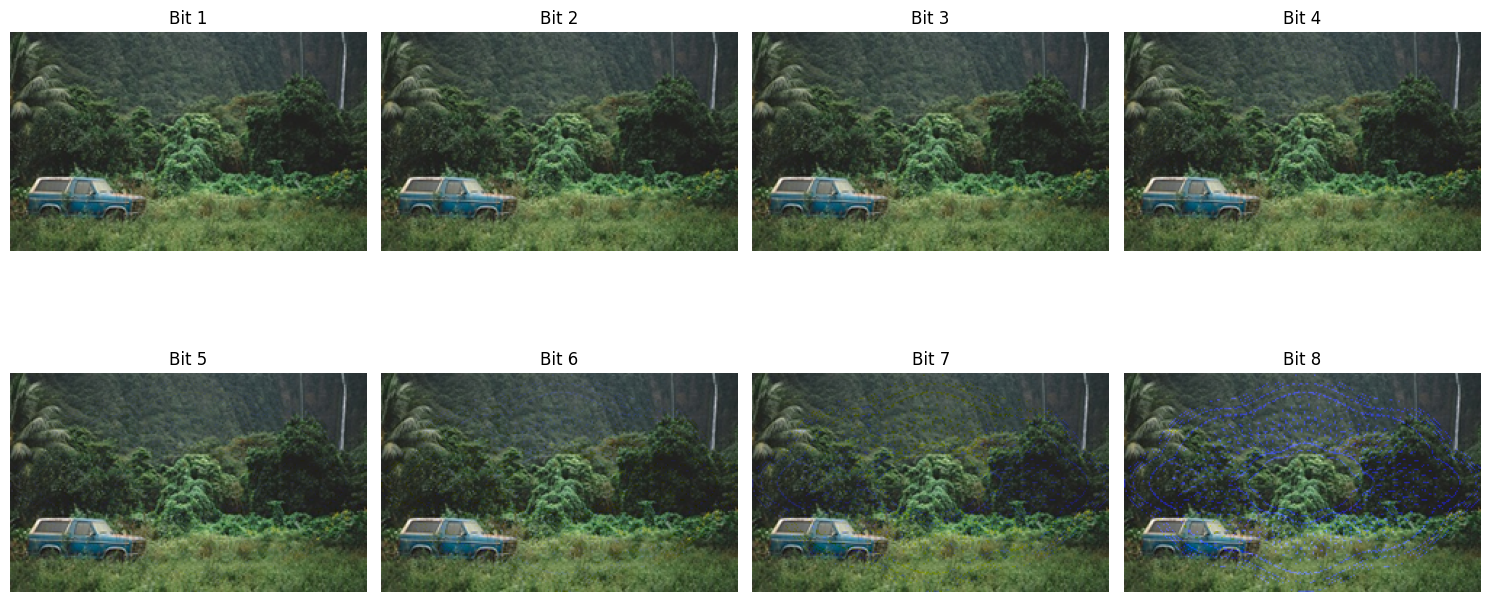

In [4]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i in range(1, 9):
    cont_b = insert_watermark(img_b, wm_bin, i)
    res = np.array(img)
    res[:, :, 2] = cont_b
    axes[i-1].imshow(res)
    axes[i-1].set_title(f'Bit {i}')
    axes[i-1].axis('off')

plt.tight_layout()
plt.show()

In [5]:
img = Image.open('imgs/image.png')
img_b = np.array(img)[:,:,2] # blue chanell

#mask / watermark
wm = Image.open('imgs/watermark_undersized.png').convert("L")
wm_bin = np.where(np.array(wm) < 128, 1, 0)

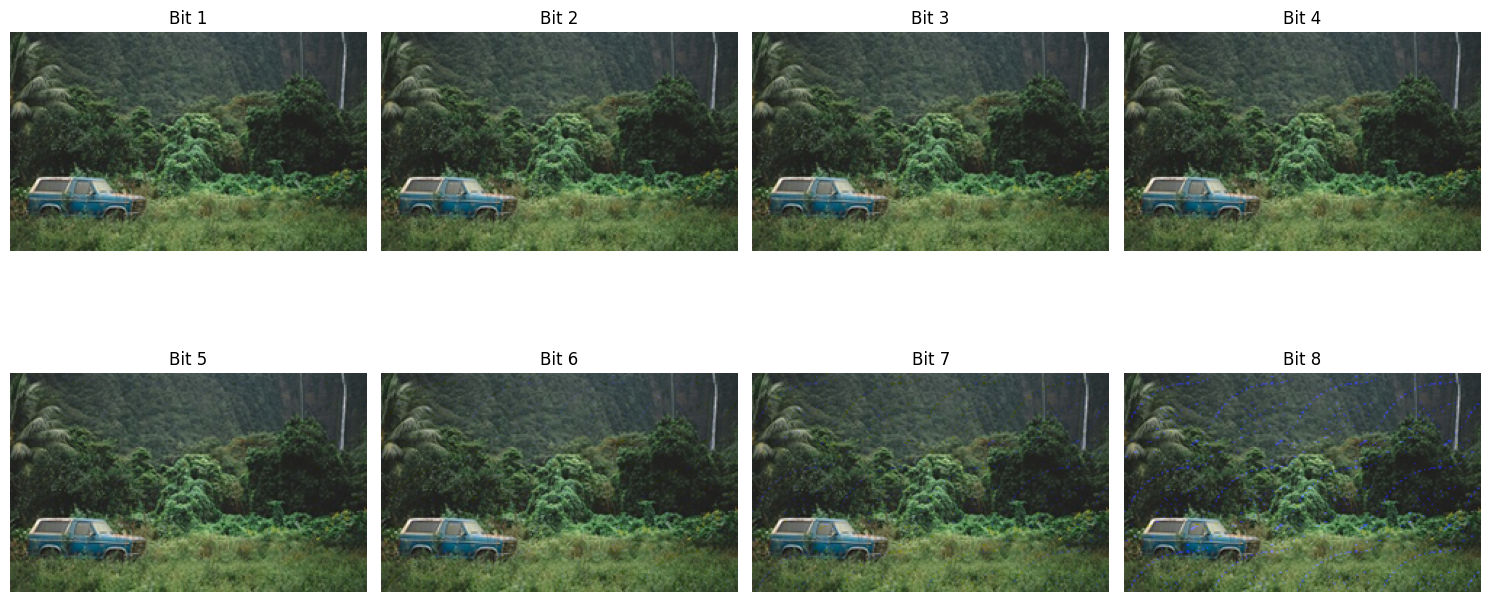

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i in range(1, 9):
    cont_b = insert_watermark(img_b, wm_bin, i)
    res = np.array(img)
    res[:, :, 2] = cont_b
    axes[i-1].imshow(res)
    axes[i-1].set_title(f'Bit {i}')
    axes[i-1].axis('off')

plt.tight_layout()
plt.show()

In [7]:
def text_to_8bit(text):
    binary_text = ""
    for char in text:
        ascii_value = ord(char)
        binary_char = format(ascii_value, '08b')
        binary_text += binary_char
    return [i for i in binary_text]


def insert_text(image, text, bin_field: int, base=8):
    text = np.array(text_to_8bit(text))
    text = np.tile(text, (image.shape[0], image.shape[1]))
    image_fields = np.unpackbits(image).reshape((image.shape[0], image.shape[1], base))
    wm_image_fields = image_fields.copy()
    for i in range(image_fields.shape[0]):
        for j in range(image_fields.shape[1]):
            wm_image_fields[i][j][base-bin_field] = image_fields[i][j][base-bin_field] ^ int(text[i][j])
    packed_wm_im = np.packbits(wm_image_fields).reshape(image.shape)
    return packed_wm_im

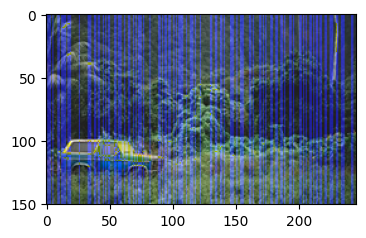

In [37]:
img = Image.open('imgs/image.png')
img_b = np.array(img)[:,:,2] # blue chanell

text = 'top secret key: 3498hj34hjkfs83'

cont_b = insert_text(img_b, text, 8)
res = np.array(img)
res[:, :, 2] = cont_b


fig, axes = plt.subplots(1,1, figsize=(4, 4))
axes.imshow(res)

In [38]:
def get_text(enc_image, image, text_len, bin_field: int, base=8):
    image_fields = np.unpackbits(image).reshape((image.shape[0], image.shape[1], base))
    enc_image_fields = np.unpackbits(enc_image).reshape((enc_image.shape[0], enc_image.shape[1], base))
    text = ''
    for i in range(image_fields.shape[0]):
        for j in range(image_fields.shape[1]):
            # text += str(image_fields[i][j][base-bin_field] ^ enc_image_fields[i][j][base-bin_field])
            text += str(enc_image_fields[i][j][base-bin_field])
    text = text[:text_len*base]
    orig_text = ''
    for i in range(0, len(text), 8):
        byte = text[i:i+8]
        orig_text += chr(int(byte, 2))

    return orig_text

In [39]:
img = Image.open('imgs/image.png')
img_b = np.array(img)[:,:,2] # blue chanell


text = get_text(res[:,:,2], img_b, len(text), 8)
print(text)

top secret key: 3498hj34hjkfw81
